In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('precision',4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar Bases

In [22]:
import os.path
def path_base(base_name,folder):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook',folder)
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [23]:
base = pd.read_csv(path_base('db_ml_analise_semester_6m_churn.csv','data'))

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\data
C:\MyGit\databricks_projetofinal_fia\data\db_ml_analise_semester_6m_churn.csv


In [24]:
base.head(3)

,yyyymm_ref,seller_id,seller_region,min_order_date,max_order_date,qty_customers,days_first_order_item,days_last_order_item,avg_days_dlv_cust,avg_days_dlv_cust_quarter,avg_days_approval,avg_days_approval_quarter,is_new,is_reactivated,is_active,is_churn,is_inactive,qty_order_item,qty_order_item_month,qty_order_item_quarter,qty_order_item_semester,qty_order_item_year,total_revenue,revenue_month,revenue_quarter,revenue_semester,revenue_year,total_outtime,total_not_delivered,total_canceled,total_bank_slip,total_cc,total_samestate,distinct_product,distinct_category,qty_review_low_4,best_category,revenue_category_semester,target
0,201709,1dcfa3835714681d4ba4a93bc1e0fd41,SP,2017-07-27T09:24:18.000Z,2017-08-28T15:14:21.000Z,7,66,34,16.625,16.630,0.750,0.750,0,0,1,0,0,8,0,8,8,8,791.390,0.000,791.390,791.390,791.390,0,0,0,2,6,1,3,1,0,home,791.390,0
1,201709,ef9952469137ff190bacafe117f51537,Se,2017-03-10T12:46:23.000Z,2017-05-30T15:57:13.000Z,5,205,124,10.200,0.000,0.400,0.000,0,0,1,0,0,5,0,0,3,5,1086.600,0.000,0.000,674.110,1086.600,0,0,0,1,4,0,2,1,0,home,674.110,1
2,201709,25debeafbce801fdd479539350185eee,SP,2017-06-05T10:45:54.000Z,2017-06-27T10:59:32.000Z,3,118,96,14.000,0.000,0.000,0.000,0,0,1,0,0,4,0,0,4,4,217.110,0.000,0.000,217.110,217.110,0,0,0,0,4,1,1,1,0,beleza_saude,217.110,0


In [25]:
base.dtypes

yyyymm_ref                     int64
seller_id                     object
seller_region                 object
min_order_date                object
max_order_date                object
qty_customers                  int64
days_first_order_item          int64
days_last_order_item           int64
avg_days_dlv_cust            float64
avg_days_dlv_cust_quarter    float64
avg_days_approval            float64
avg_days_approval_quarter    float64
is_new                         int64
is_reactivated                 int64
is_active                      int64
is_churn                       int64
is_inactive                    int64
qty_order_item                 int64
qty_order_item_month           int64
qty_order_item_quarter         int64
qty_order_item_semester        int64
qty_order_item_year            int64
total_revenue                float64
revenue_month                float64
revenue_quarter              float64
revenue_semester             float64
revenue_year                 float64
t

In [26]:
base.nunique()

yyyymm_ref                      6
seller_id                    1248
seller_region                   6
min_order_date               1248
max_order_date               1575
qty_customers                  82
days_first_order_item         382
days_last_order_item          154
avg_days_dlv_cust             634
avg_days_dlv_cust_quarter     558
avg_days_approval             249
avg_days_approval_quarter      92
is_new                          1
is_reactivated                  1
is_active                       1
is_churn                        1
is_inactive                     1
qty_order_item                 86
qty_order_item_month            4
qty_order_item_quarter         36
qty_order_item_semester        68
qty_order_item_year            93
total_revenue                1566
revenue_month                  27
revenue_quarter              1627
revenue_semester             2135
revenue_year                 1660
total_outtime                  25
total_not_delivered            12
total_canceled

In [27]:
base.isnull().sum()

yyyymm_ref                     0
seller_id                      0
seller_region                  0
min_order_date                 0
max_order_date                 0
qty_customers                  0
days_first_order_item          0
days_last_order_item           0
avg_days_dlv_cust            187
avg_days_dlv_cust_quarter     69
avg_days_approval              0
avg_days_approval_quarter      0
is_new                         0
is_reactivated                 0
is_active                      0
is_churn                       0
is_inactive                    0
qty_order_item                 0
qty_order_item_month           0
qty_order_item_quarter         0
qty_order_item_semester        0
qty_order_item_year            0
total_revenue                  0
revenue_month                  0
revenue_quarter                0
revenue_semester               0
revenue_year                   0
total_outtime                  0
total_not_delivered            0
total_canceled                 0
total_bank

In [28]:
base.avg_days_dlv_cust = base.avg_days_dlv_cust.fillna(base.avg_days_dlv_cust.mean())
base.avg_days_dlv_cust_quarter = base.avg_days_dlv_cust_quarter.fillna(base.avg_days_dlv_cust_quarter.mean())
base.revenue_category_semester = base.revenue_category_semester.fillna(base.revenue_category_semester.mean())
base.isnull().sum()

yyyymm_ref                   0
seller_id                    0
seller_region                0
min_order_date               0
max_order_date               0
qty_customers                0
days_first_order_item        0
days_last_order_item         0
avg_days_dlv_cust            0
avg_days_dlv_cust_quarter    0
avg_days_approval            0
avg_days_approval_quarter    0
is_new                       0
is_reactivated               0
is_active                    0
is_churn                     0
is_inactive                  0
qty_order_item               0
qty_order_item_month         0
qty_order_item_quarter       0
qty_order_item_semester      0
qty_order_item_year          0
total_revenue                0
revenue_month                0
revenue_quarter              0
revenue_semester             0
revenue_year                 0
total_outtime                0
total_not_delivered          0
total_canceled               0
total_bank_slip              0
total_cc                     0
total_sa

In [29]:
dados = base[['seller_region',
                'qty_customers',
                'days_first_order_item',
                'days_last_order_item',
                'avg_days_dlv_cust',
                'avg_days_dlv_cust_quarter',
                'avg_days_approval',
                'avg_days_approval_quarter',
                'qty_order_item',
                'qty_order_item_month',
                'qty_order_item_quarter',
                'qty_order_item_semester',
                'qty_order_item_year',
                'total_revenue',
                'revenue_month',
                'revenue_quarter',
                'revenue_semester',
                'revenue_year',
                'total_outtime',
                'total_not_delivered',
                'total_canceled',
                'total_bank_slip',
                'total_cc',
                'total_samestate',
                'distinct_product',
                'distinct_category',
                'qty_review_low_4',
                'best_category',
                'revenue_category_semester',
                'target']]

# Criar dummies para var categoricas

In [30]:
base_categoricas = ['seller_region',
                    'best_category'
                   ]
dum = pd.get_dummies(dados,
                    columns=base_categoricas,
                    drop_first=True,
                    prefix=base_categoricas,
                     prefix_sep='_'
                    )

In [31]:
dum.head(3)

,qty_customers,days_first_order_item,days_last_order_item,avg_days_dlv_cust,avg_days_dlv_cust_quarter,avg_days_approval,avg_days_approval_quarter,qty_order_item,qty_order_item_month,qty_order_item_quarter,qty_order_item_semester,qty_order_item_year,total_revenue,revenue_month,revenue_quarter,revenue_semester,revenue_year,total_outtime,total_not_delivered,total_canceled,total_bank_slip,total_cc,total_samestate,distinct_product,distinct_category,qty_review_low_4,revenue_category_semester,target,seller_region_N,seller_region_Ne,seller_region_S,seller_region_SP,seller_region_Se,best_category_automotivo,best_category_bebes,best_category_beleza_saude,best_category_eletro,best_category_escritorio,best_category_esporte_lazer,best_category_fashion,best_category_home,best_category_informatica,best_category_livros_papelaria,best_category_ni,best_category_pet_shop,best_category_presentes,best_category_servico,best_category_telefonia
0,7,66,34,16.625,16.630,0.750,0.750,8,0,8,8,8,791.390,0.000,791.390,791.390,791.390,0,0,0,2,6,1,3,1,0,791.390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,205,124,10.200,0.000,0.400,0.000,5,0,0,3,5,1086.600,0.000,0.000,674.110,1086.600,0,0,0,1,4,0,2,1,0,674.110,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,118,96,14.000,0.000,0.000,0.000,4,0,0,4,4,217.110,0.000,0.000,217.110,217.110,0,0,0,0,4,1,1,1,0,217.110,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
dum.columns

Index(['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust', 'avg_days_dlv_cust_quarter', 'avg_days_approval', 'avg_days_approval_quarter', 'qty_order_item', 'qty_order_item_month', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 'total_revenue', 'revenue_month', 'revenue_quarter', 'revenue_semester', 'revenue_year', 'total_outtime', 'total_not_delivered', 'total_canceled', 'total_bank_slip', 'total_cc', 'total_samestate', 'distinct_product', 'distinct_category', 'qty_review_low_4', 'revenue_category_semester', 'target', 'seller_region_N', 'seller_region_Ne', 'seller_region_S', 'seller_region_SP', 'seller_region_Se', 'best_category_automotivo', 'best_category_bebes', 'best_category_beleza_saude', 'best_category_eletro', 'best_category_escritorio', 'best_category_esporte_lazer', 'best_category_fashion', 'best_category_home', 'best_category_informatica', 'best_category_livros_papelaria', 'best_category_ni',
       'best_categor

In [33]:
dados_selecionados = dum[['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust', 'avg_days_dlv_cust_quarter', 'avg_days_approval', 'avg_days_approval_quarter', 
                          'qty_order_item', 'qty_order_item_month', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 
                          'total_revenue', 'revenue_month', 'revenue_quarter', 'revenue_semester', 'revenue_year', 
                          'total_outtime', 'total_not_delivered', 'total_canceled', 'total_bank_slip', 'total_cc', 
                          'total_samestate', 'distinct_product', 'distinct_category', 'qty_review_low_4', 'revenue_category_semester', 'target', 
                          'seller_region_N', 'seller_region_Ne', 'seller_region_S', 'seller_region_SP', 'seller_region_Se',
                          'best_category_automotivo', 'best_category_bebes', 'best_category_beleza_saude', 'best_category_eletro',
                          'best_category_escritorio', 'best_category_esporte_lazer', 'best_category_fashion', 
                          'best_category_home', 'best_category_informatica', 'best_category_livros_papelaria', 'best_category_ni',
                          'best_category_pet_shop', 'best_category_presentes', 'best_category_servico', 'best_category_telefonia']]

In [34]:
dados_selecionados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty_customers,3414.000,8.342,17.067,1.000,1.000,3.000,8.000,264.000
days_first_order_item,3414.000,184.373,97.820,31.000,102.000,172.000,258.000,418.000
days_last_order_item,3414.000,86.487,43.787,31.000,48.000,76.000,120.000,184.000
avg_days_dlv_cust,3414.000,13.611,7.396,1.000,9.387,12.615,15.429,86.000
avg_days_dlv_cust_quarter,3414.000,4.574,7.207,0.000,0.000,1.495,6.400,86.000
avg_days_approval,3414.000,0.519,0.601,0.000,0.000,0.400,0.778,5.000
avg_days_approval_quarter,3414.000,0.181,0.438,0.000,0.000,0.000,0.130,4.000
qty_order_item,3414.000,9.529,19.060,1.000,2.000,4.000,10.000,272.000
qty_order_item_month,3414.000,0.010,0.131,0.000,0.000,0.000,0.000,4.000
qty_order_item_quarter,3414.000,1.922,4.175,0.000,0.000,1.000,2.000,98.000


# Determinar melhores variaveis para todos os modelos

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [36]:
expl = dados_selecionados.drop(columns=['target'])
target = dados_selecionados.target

In [37]:
# Normalizar
expl_norm = StandardScaler().fit_transform(expl)

In [38]:
expl_norm

array([[-0.07865211, -1.21028743, -1.19885431, ..., -0.34599332,
        -0.10749677, -0.14573403],
       [-0.19585783,  0.21089571,  0.85685209, ..., -0.34599332,
        -0.10749677, -0.14573403],
       [-0.31306355, -0.67862179,  0.21729899, ..., -0.34599332,
        -0.10749677, -0.14573403],
       ...,
       [ 0.27296505,  0.86525342,  1.26799337, ..., -0.34599332,
        -0.10749677, -0.14573403],
       [ 1.09340511,  0.64031796, -0.71918948, ..., -0.34599332,
        -0.10749677, -0.14573403],
       [-0.43026928, -0.3923403 ,  1.3593581 , ...,  2.89022917,
        -0.10749677, -0.14573403]])

### baseado em filtro

In [39]:
chi_selector = SelectKBest(chi2,k=25)
chi_selector.fit(expl,target)

SelectKBest(k=25, score_func=<function chi2 at 0x0000017D5983A4C8>)

In [40]:
chi_support = chi_selector.get_support()
chi_feature = expl.loc[:,chi_support].columns.tolist()

In [41]:
print(len(chi_feature), ' é número de variaveis selecionadas')
print(chi_feature)

25  é número de variaveis selecionadas
['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust_quarter', 'avg_days_approval_quarter', 'qty_order_item', 'qty_order_item_month', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 'total_revenue', 'revenue_month', 'revenue_quarter', 'revenue_semester', 'revenue_year', 'total_not_delivered', 'total_canceled', 'total_bank_slip', 'total_cc', 'total_samestate', 'distinct_product', 'distinct_category', 'revenue_category_semester', 'seller_region_Ne', 'best_category_ni']


### wraper

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [43]:
rfe_selector = RFE(estimator=LogisticRegression( C=1.0, class_weight=None, dual=False,
                                                 fit_intercept=True, intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto', n_jobs=None, penalty='l2',
                                                 random_state=42, solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                  step=100,           
                  n_features_to_select=25)
rfe_selector.fit(expl,target)
rfe_support = rfe_selector.get_support()
rfe_feature = expl.loc[:,rfe_support].columns.tolist()

In [44]:
print(len(rfe_feature), ' é número de variaveis selecionadas')
print(rfe_feature)

25  é número de variaveis selecionadas
['qty_customers', 'days_last_order_item', 'avg_days_dlv_cust', 'qty_order_item', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 'total_outtime', 'total_not_delivered', 'total_canceled', 'total_bank_slip', 'total_cc', 'total_samestate', 'distinct_product', 'distinct_category', 'seller_region_Ne', 'seller_region_S', 'best_category_automotivo', 'best_category_bebes', 'best_category_beleza_saude', 'best_category_esporte_lazer', 'best_category_home', 'best_category_livros_papelaria', 'best_category_ni', 'best_category_presentes']


In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
rfe_selector1 = RFE(estimator=RandomForestClassifier(n_estimators=300),
                  step=100,           
                  n_features_to_select=25)
rfe_selector1.fit(expl,target)
rfe_support1 = rfe_selector1.get_support()
rfe_feature1 = expl.loc[:,rfe_support1].columns.tolist()

In [46]:
print(len(rfe_feature1), ' é número de variaveis selecionadas')
print(rfe_feature1)

25  é número de variaveis selecionadas
['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust', 'avg_days_dlv_cust_quarter', 'avg_days_approval', 'avg_days_approval_quarter', 'qty_order_item', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 'total_revenue', 'revenue_quarter', 'revenue_semester', 'revenue_year', 'total_outtime', 'total_not_delivered', 'total_bank_slip', 'total_cc', 'total_samestate', 'distinct_product', 'distinct_category', 'revenue_category_semester', 'best_category_home', 'best_category_livros_papelaria']


### Embarcada

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=300),
                              max_features=25)
rf_selector.fit(expl,target)
rf_support = rf_selector.get_support()
rf_feature = expl.loc[:,rf_support].columns.tolist()

In [49]:
print(len(rf_feature), ' é número de variaveis selecionadas')
print(rf_feature)

19  é número de variaveis selecionadas
['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust', 'avg_days_dlv_cust_quarter', 'avg_days_approval', 'avg_days_approval_quarter', 'qty_order_item', 'qty_order_item_quarter', 'qty_order_item_semester', 'qty_order_item_year', 'total_revenue', 'revenue_quarter', 'revenue_semester', 'revenue_year', 'total_cc', 'total_samestate', 'distinct_product', 'revenue_category_semester']


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
rf_selector1 = SelectFromModel(estimator=GradientBoostingClassifier(random_state=42),
                              max_features=25)
rf_selector1.fit(expl,target)
rf_support1 = rf_selector1.get_support()
rf_feature1 = expl.loc[:,rf_support1].columns.tolist()

In [51]:
print(len(rf_feature1), ' é número de variaveis selecionadas')
print(rf_feature1)

13  é número de variaveis selecionadas
['qty_customers', 'days_first_order_item', 'days_last_order_item', 'avg_days_dlv_cust', 'avg_days_dlv_cust_quarter', 'avg_days_approval', 'total_revenue', 'revenue_quarter', 'revenue_semester', 'total_not_delivered', 'revenue_category_semester', 'best_category_livros_papelaria', 'best_category_ni']


In [52]:
#comparando 
feature_selection_df = pd.DataFrame({'Variaveis': expl.columns,
                                    'Chi-2':chi_support,
                                    'RFE': rfe_support,
                                     'RFE1':rfe_support1,
                                    'RF':rf_support,
                                    'RF1':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variaveis'],
                                                        ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variaveis,Chi-2,RFE,RFE1,RF,RF1,Total
1,qty_customers,True,True,True,True,True,5
2,days_last_order_item,True,True,True,True,True,5
3,total_samestate,True,True,True,True,False,4
4,total_revenue,True,False,True,True,True,4
5,total_not_delivered,True,True,True,False,True,4
6,total_cc,True,True,True,True,False,4
7,revenue_semester,True,False,True,True,True,4
8,revenue_quarter,True,False,True,True,True,4
9,revenue_category_semester,True,False,True,True,True,4
10,qty_order_item_year,True,True,True,True,False,4


In [53]:
feature_selection_df[feature_selection_df.Total.isin([5,4,3,2,1])].Variaveis

1                      qty_customers
2               days_last_order_item
3                    total_samestate
4                      total_revenue
5                total_not_delivered
6                           total_cc
7                   revenue_semester
8                    revenue_quarter
9          revenue_category_semester
10               qty_order_item_year
11           qty_order_item_semester
12            qty_order_item_quarter
13                    qty_order_item
14                  distinct_product
15             days_first_order_item
16         avg_days_dlv_cust_quarter
17                 avg_days_dlv_cust
18                   total_bank_slip
19                      revenue_year
20                 distinct_category
21                  best_category_ni
22    best_category_livros_papelaria
23         avg_days_approval_quarter
24                 avg_days_approval
25                     total_outtime
26                    total_canceled
27                  seller_region_Ne
2

In [57]:
explicativas = dados_selecionados[[ 'qty_customers',
                                    'days_last_order_item',
                                    'total_samestate',
                                    'total_revenue',
                                    'total_not_delivered',
                                    'total_cc',
                                    'revenue_semester',
                                    'revenue_quarter',
                                    'revenue_category_semester',
                                    'qty_order_item_year',
                                    'qty_order_item_semester',
                                    'qty_order_item_quarter',
                                    'qty_order_item',
                                    'distinct_product',
                                    'days_first_order_item',
                                    'avg_days_dlv_cust_quarter',
                                    'avg_days_dlv_cust',
                                    'total_bank_slip',
                                    'revenue_year',
                                    'distinct_category',
                                    'best_category_ni',
                                    'best_category_livros_papelaria',
                                    'avg_days_approval_quarter',
                                    'avg_days_approval',
                                    'total_outtime',
                                    'total_canceled',
                                    'seller_region_Ne',
                                    'best_category_home',
                                    'seller_region_S',
                                    'revenue_month',
                                    'qty_order_item_month',
                                    'best_category_presentes',
                                    'best_category_esporte_lazer',
                                    'best_category_beleza_saude',
                                    'best_category_bebes',
                                    'best_category_automotivo'
                                  ]]

# Treino só com variaveis escolhas

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       target,
                                                       test_size=0.25,
                                                       random_state = 42)

# Regressão Logistica

In [60]:
# dicionario
lr_grid_dc = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,2,3,5],
    'random_state' : [42]
}

In [61]:
lr = LogisticRegression()

In [62]:
from sklearn.model_selection import GridSearchCV
lr_grid = GridSearchCV(estimator=lr,
                      param_grid=lr_grid_dc,
                       cv=5)

lr_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2, 3, 5], 'random_state': [42],
                         'tol': [0.0001, 1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
lr_grid.best_params_

{'C': 2, 'random_state': 42, 'tol': 0.0001}

In [64]:
lr_grid.best_score_

0.7140625

In [65]:
from sklearn.externals import joblib
joblib.dump(lr_grid.best_estimator_,path_base('modelo_lr_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_lr = open(path_base('modelo_lr_schurnvm_gridsearch.pkl','model'),'rb')
model_lr = joblib.load(modelo_treinado_lr)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_lr_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_lr_schurnvm_gridsearch.pkl


In [66]:
model_lr

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
model_lr.predict(x_teste)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_lr_teste = model_lr.predict(x_teste)
acc_lr_teste = round(accuracy_score(y_lr_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_lr_teste)
print('Teste: ',acc_lr_teste)
print('Matriz: ',matriz)

Teste:  70.37
Matriz:  [[ 83 183]
 [ 70 518]]


# Tree

In [70]:
# dicionario
tree_grid_dc = { 'min_samples_leaf': [1,5,10],
                'min_samples_split': [1.0,5],
                'max_depth': [1,5,12],
                'criterion': ['gini','entropy'],
                'random_state' : [42]
}

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV
tree_grid = GridSearchCV(estimator=tree,
                      param_grid=tree_grid_dc,
                       cv=5)

tree_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [73]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'random_state': 42}

In [74]:
tree_grid.best_score_

0.712890625

In [75]:
joblib.dump(tree_grid.best_estimator_,path_base('modelo_tree_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_tree = open(path_base('modelo_tree_schurnvm_gridsearch.pkl','model'),'rb')
model_tree = joblib.load(modelo_treinado_tree)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_tree_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_tree_schurnvm_gridsearch.pkl


In [76]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [77]:
model_tree.predict(x_teste)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [78]:
y_tree_teste = model_tree.predict(x_teste)
acc_tree_teste = round(accuracy_score(y_tree_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_tree_teste)
print('Teste: ',acc_tree_teste)
print('Matriz: ',matriz)

Teste:  71.08
Matriz:  [[130 136]
 [111 477]]


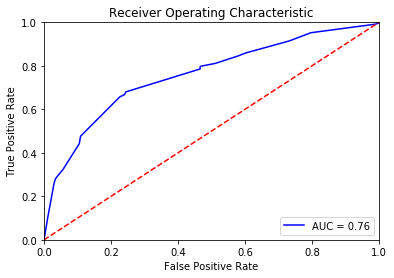

In [79]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_tree.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Random Forest

In [80]:
rf_grid_dc = {
    'n_estimators': [100,500],
    'criterion': ['entropy'],
    'bootstrap': [True],
    'random_state' : [42]
}

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [82]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_grid_dc,
                       scoring ='accuracy',
                       cv=5)

In [83]:
rf_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [84]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 100,
 'random_state': 42}

In [85]:
rf_grid.best_score_

0.779296875

In [86]:
joblib.dump(rf_grid.best_estimator_,path_base('modelo_rf_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_rf = open(path_base('modelo_rf_schurnvm_gridsearch.pkl','model'),'rb')
model_rf = joblib.load(modelo_treinado_rf)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_rf_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_rf_schurnvm_gridsearch.pkl


In [87]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [88]:
model_rf.predict(x_teste)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [89]:
y_rf_teste = model_rf.predict(x_teste)
acc_rf_teste = round(accuracy_score(y_rf_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_rf_teste)
print('Teste: ',acc_rf_teste)
print('Matriz: ',matriz)

Teste:  78.34
Matriz:  [[157 109]
 [ 76 512]]


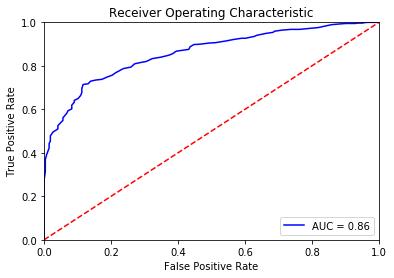

In [90]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_rf.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting

In [91]:
# dicionario
gb_grid_dc = {
    'min_samples_leaf': [1],
    'min_samples_split': [11,12],
    'learning_rate' : [0.06,0.05],
    'max_depth': [12,13],
    'n_estimators': [800,700],
    'random_state' : [42]
}

# dicionario
gb_grid_dc = {
    'min_samples_leaf': [1,10,20],
    'min_samples_split': [3,10,20],
    'learning_rate' : [0.1,0.05],
    'max_depth': [1,12,20],
    'n_estimators': [200, 400, 800],
    'random_state' : [42]
}

{'learning_rate': 0.05,
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800,
 'random_state': 42}
 
 Accuracy 77.93   Auc 0.87

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()


In [93]:
from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                      param_grid=gb_grid_dc,
                       cv=5)

In [94]:
gb_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [95]:
gb_grid.best_params_

{'learning_rate': 0.06,
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 800,
 'random_state': 42}

In [96]:
gb_grid.best_score_

0.80703125

In [97]:
joblib.dump(gb_grid.best_estimator_,path_base('modelo_gb_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_gb = open(path_base('modelo_gb_schurnvm_gridsearch.pkl','model'),'rb')
model_gb = joblib.load(modelo_treinado_gb)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_gb_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_gb_schurnvm_gridsearch.pkl


In [98]:
model_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.06, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=12,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
model_gb.predict(x_teste)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [100]:
y_gb_teste = model_gb.predict(x_teste)
acc_gb_teste = round(accuracy_score(y_gb_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_gb_teste)
print('Teste: ',acc_gb_teste)
print('Matriz: ',matriz)

Teste:  84.19
Matriz:  [[188  78]
 [ 57 531]]


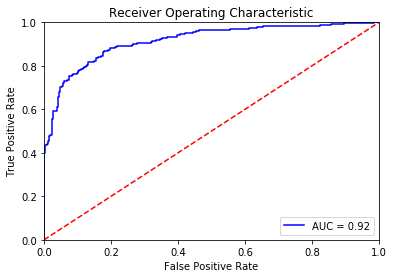

In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_gb.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Neural

In [102]:
# dicionario
mlp_grid_dc = {
    'max_iter': [10,100],
    'tol': [0.0001,0.00001],
    'solver': ['adam'],
    'hidden_layer_sizes':[(50,50),(300)],
    'activation': ['relu'],
    'random_state' : [42]
}

In [103]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose = False)


In [104]:
from sklearn.model_selection import GridSearchCV
mlp_grid = GridSearchCV(estimator=mlp,
                      param_grid=mlp_grid_dc,
                       cv=5)

In [105]:
mlp_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...le=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activat

In [106]:
mlp_grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 300,
 'max_iter': 10,
 'random_state': 42,
 'solver': 'adam',
 'tol': 0.0001}

In [107]:
mlp_grid.best_score_

0.6921875

In [108]:
from sklearn.externals import joblib
joblib.dump(mlp_grid.best_estimator_,path_base('modelo_mlp_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_mlp = open(path_base('modelo_mlp_schurnvm_gridsearch.pkl','model'),'rb')
model_mlp = joblib.load(modelo_treinado_mlp)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_mlp_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_mlp_schurnvm_gridsearch.pkl


In [109]:
model_mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [110]:
model_mlp.predict(x_teste)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [111]:
from sklearn.metrics import accuracy_score
y_mlp_teste = model_mlp.predict(x_teste)
acc_mlp_teste = round(accuracy_score(y_mlp_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_mlp_teste)
print('Teste: ',acc_mlp_teste)
print('Matriz: ',matriz)

Teste:  69.56
Matriz:  [[ 36 230]
 [ 30 558]]


# xgboost

# dicionario
xgbc_grid_dc = {
    'max_depth': [8],
    'learning_rate': [0.1],
    'n_estimators': [400,800],
    'colsample_bytree':[0.3,0.8],
    'reg_alpha': [2,5],
    'random_state' : [42]
}

In [112]:
# dicionario
xgbc_grid_dc = {
    'max_depth': [8,12],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [400,600],
    'colsample_bytree':[1,0.8],
    'reg_alpha': [2,3],
    'random_state' : [42]
}

In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [114]:
xgbc = xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',n_jobs=2)

In [115]:
from sklearn.model_selection import GridSearchCV
xgbc_grid = GridSearchCV(estimator=xgbc,
                          param_grid=xgbc_grid_dc,
                           cv=5)

In [116]:
xgbc_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=2,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [1, 0.8],
                         'learning_rate': [0.1, 0.05], 'max_depth': [8, 12],
                         'n_estimators': [400

In [117]:
xgbc_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 400,
 'random_state': 42,
 'reg_alpha': 2}

In [118]:
xgbc_grid.best_score_

0.79453125

In [119]:
from sklearn.externals import joblib
joblib.dump(xgbc_grid.best_estimator_,path_base('modelo_xgbc_schurnvm_gridsearch.pkl','model'),compress=1)
modelo_treinado_xgbc = open(path_base('modelo_xgbc_schurnvm_gridsearch.pkl','model'),'rb')
model_xgbc = joblib.load(modelo_treinado_xgbc)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_xgbc_schurnvm_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_xgbc_schurnvm_gridsearch.pkl


In [120]:
model_xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, n_estimators=400, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [121]:
model_xgbc.predict(x_teste)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_xgbc_teste = model_xgbc.predict(x_teste)
acc_xgbc_teste = round(accuracy_score(y_xgbc_teste,y_teste)*100,2)
matriz = confusion_matrix(y_teste,y_xgbc_teste)
print('Teste: ',acc_xgbc_teste)
print('Matriz: ',matriz)

Teste:  81.15
Matriz:  [[177  89]
 [ 72 516]]


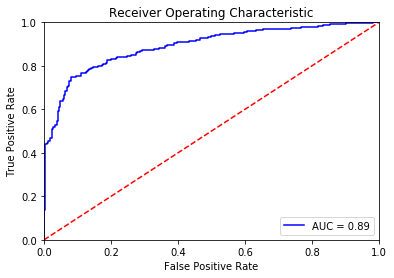

In [123]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_xgbc.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusão
<ul>
<li>Feito análise inicial com seleção de variáveis e grid search e algorítimo com melhor resultado foi
    Gradient Boost com accuracy média na base de treino 80.70 e de 84.19 na base de testes e com AUC = 0.92 </li>
</ul>